In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss0.csv', on_bad_lines='skip')
df2 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss5.csv', on_bad_lines='skip')
df3 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/diss9.csv', on_bad_lines='skip')
df4 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/fluid-attempt.csv', on_bad_lines='skip')
df5 = pd.read_csv(f'/home/156/jm0124/kae-cyclones/src/sst-attempt.csv', on_bad_lines='skip')

In [3]:
df.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
df2.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
df3.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
df4.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']
df5.columns = ['run', 'penalty', 'init', 'loss', 'val_loss']

In [4]:
for index in range(0,len(df)):
    if index >= 4499:
        df.loc[index,'penalty'] = 'no-penalty'

In [5]:
df.loc[4498]

run               0
penalty     inverse
init        uniform
loss        0.31106
val_loss    0.07537
Name: 4498, dtype: object

In [6]:
def create_list_loss(df):
    l1 = {}
    l2 = {}
    for i, dictionary in enumerate([l1, l2]):
        avg_list = [[],[],[]]
        prev_penalty ='max'
        prev_init = 'uniform'

        for index, row in df.iterrows():
            if row['penalty'] == prev_penalty and row['init'] == prev_init:
                if i == 0:
                    avg_list[row['run']].append(row['loss'])
                elif i == 1:
                    avg_list[row['run']].append(row['val_loss'])
            else:
                final_list = []
                for i in range(0, len(avg_list[0])-1):
                    avg = 0
                    for l in range(0,len(avg_list)):
                        try:
                            avg += avg_list[l][i]/len(avg_list)
                        except:
                            avg += 0
                    final_list.append(avg)
                dictionary[f"{prev_penalty}-{prev_init}"] = final_list

                prev_penalty = row['penalty']
                prev_init = row['init']

                avg_list = [[],[],[]]
                if i == 0:
                    avg_list[row['run']].append(row['loss'])
                elif i == 1
                    avg_list[row['run']].append(row['val_loss'])

        final_list = []
        for i in range(0, len(avg_list[0])-1):
            avg = 0
            for l in range(0,len(avg_list)):
                try:
                    avg += avg_list[l][i]/len(avg_list)
                except:
                    avg += 0
            final_list.append(avg)
        dictionary[f"{prev_penalty}-{prev_init}"] = final_list
    
    return l1, l2

final_list_loss_diss0, final_list_val_diss0 = create_list_loss(df)
final_list_loss_diss5, final_list_val_diss5 = create_list_loss(df2)
final_list_loss_diss9, final_list_val_diss9 = create_list_loss(df3)
final_list_loss_fluid, final_list_val_fluid = create_list_loss(df4)
final_list_loss_ocean, final_list_val_ocean = create_list_loss(df5)

# for dictionary in [final_list_loss_diss0, final_list_val_diss0]:
#     avg_list = [[],[],[]]
#     prev_penalty ='max'
#     prev_init = 'uniform'
    
#     for index, row in df.iterrows():
#         if row['penalty'] == prev_penalty and row['init'] == prev_init:
#             if dictionary == final_list_loss_diss0:
#                 avg_list[row['run']].append(row['loss'])
#             else:
#                 avg_list[row['run']].append(row['val_loss'])
#         else:
#             final_list = []
#             for i in range(0, len(avg_list[0])-1):
#                 avg = 0
#                 for l in range(0,len(avg_list)):
#                     try:
#                         avg += avg_list[l][i]/len(avg_list)
#                     except:
#                         avg += 0
#                 final_list.append(avg)
#             dictionary[f"{prev_penalty}-{prev_init}"] = final_list

#             prev_penalty = row['penalty']
#             prev_init = row['init']

#             avg_list = [[],[],[]]
#             avg_list[row['run']].append(row['loss'])
    
#     final_list = []
#     for i in range(0, len(avg_list[0])-1):
#         avg = 0
#         for l in range(0,len(avg_list)):
#             try:
#                 avg += avg_list[l][i]/len(avg_list)
#             except:
#                 avg += 0
#         final_list.append(avg)
#     dictionary[f"{prev_penalty}-{prev_init}"] = final_list

In [7]:
final_list_loss_ocean.keys()

dict_keys(['max-uniform', 'average-uniform', 'average-gaussian', 'average-double-gaussian', 'average-uniform-small', 'average-gaussian element', 'max-gaussian', 'max-double-gaussian', 'max-uniform-small', 'max-gaussian element', 'inverse-uniform', 'inverse-gaussian', 'inverse-double-gaussian', 'inverse-uniform-small', 'inverse-gaussian element', 'no-penalty-uniform', 'no-penalty-gaussian', 'no-penalty-double-gaussian', 'no-penalty-uniform-small', 'no-penalty-gaussian element'])

In [8]:
final_list_val_diss9 == final_list_loss_diss9

False

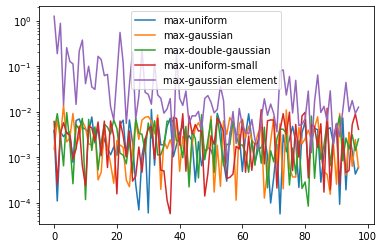

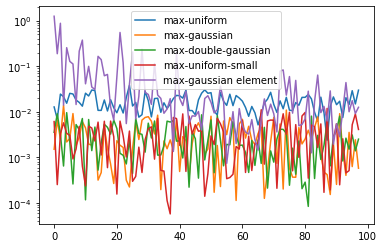

In [9]:
for label, item_list in final_list_val_diss5.items():
    if label.startswith('max'):
        plt.plot(list(range(0,98)),item_list[:98], label=str(label))
plt.yscale('log')
plt.legend()
plt.show()

for label, item_list in final_list_loss_diss5.items():
    if label.startswith('max'):
        plt.plot(list(range(0,98)),item_list[:98], label=str(label))
plt.yscale('log')
plt.legend()
plt.show()


In [14]:
final_list_loss_diss9 == final_list_val_diss9

False

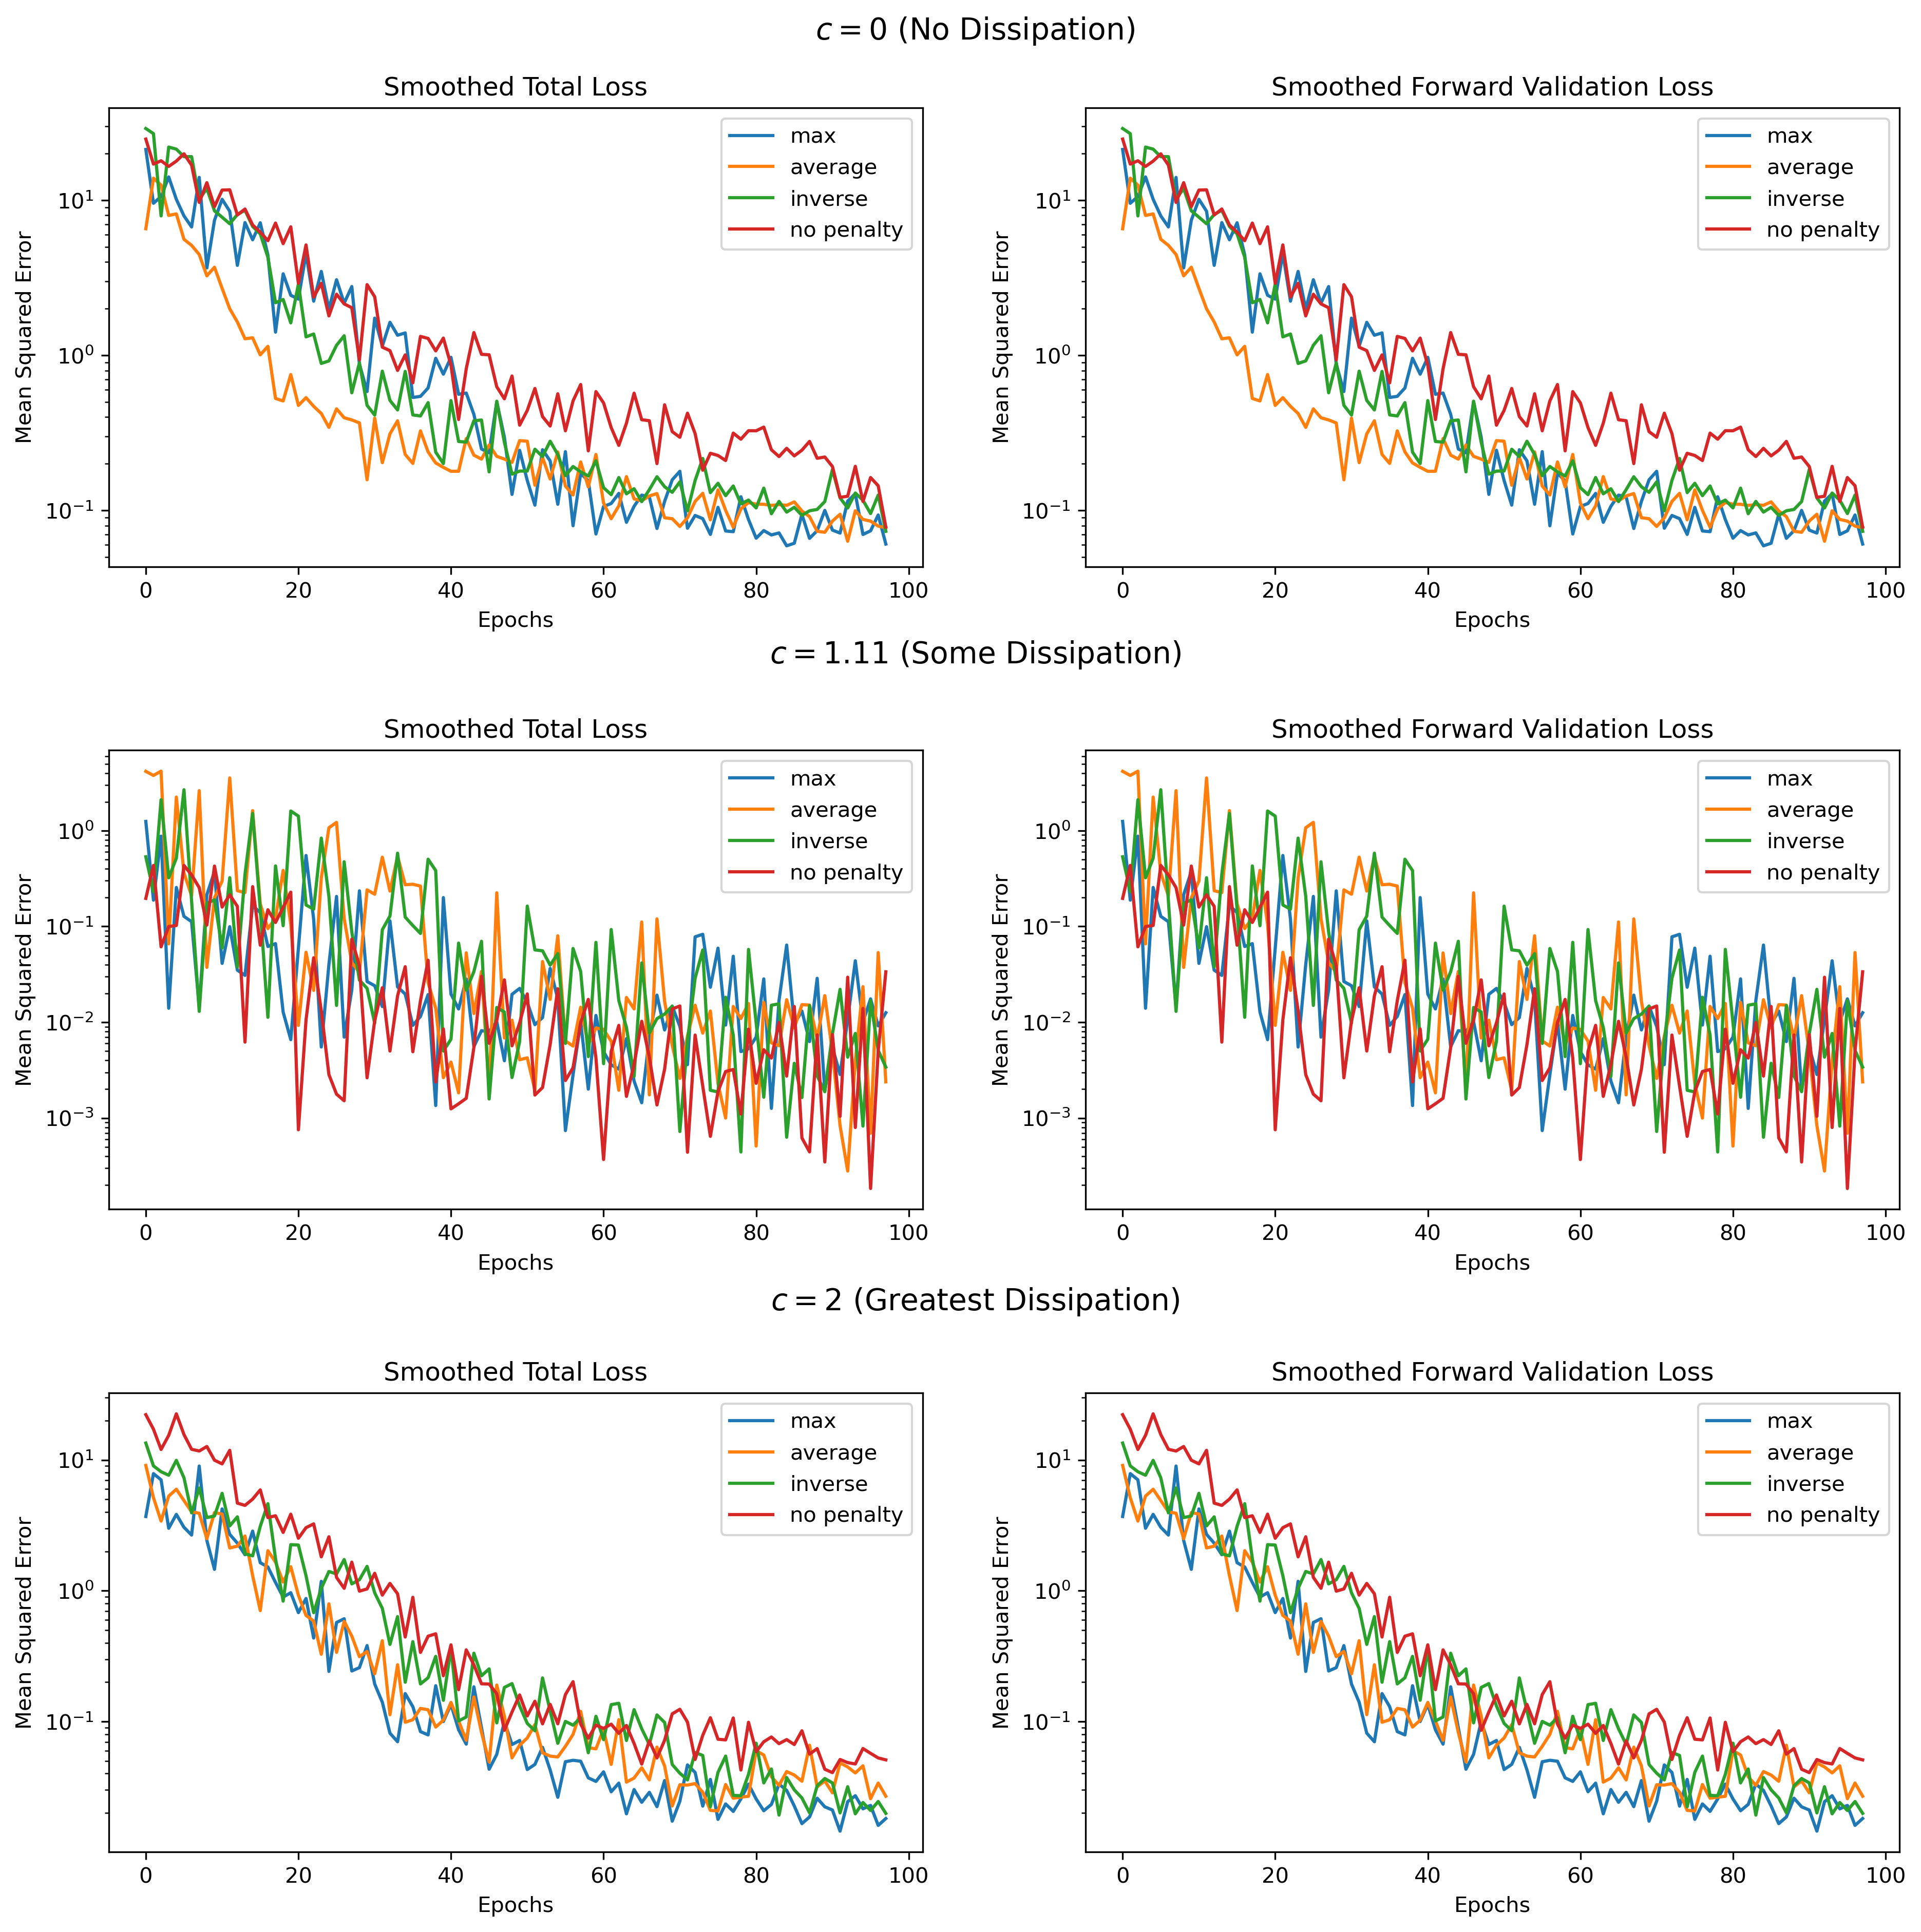

In [15]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for label, item_list in final_list_loss_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[0][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss0.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[0][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for label, item_list in final_list_loss_diss5.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[1][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss5.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[1][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for label, item_list in final_list_loss_diss9.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[2][0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[2][0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_diss9.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[2][1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            axs[2][1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.legend(loc=1)

    l[0].set_title('Smoothed Total Loss')
    l[1].set_title('Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.65, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.37, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('new_avg_diss_graph.png')


# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)

no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element
no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element
no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element


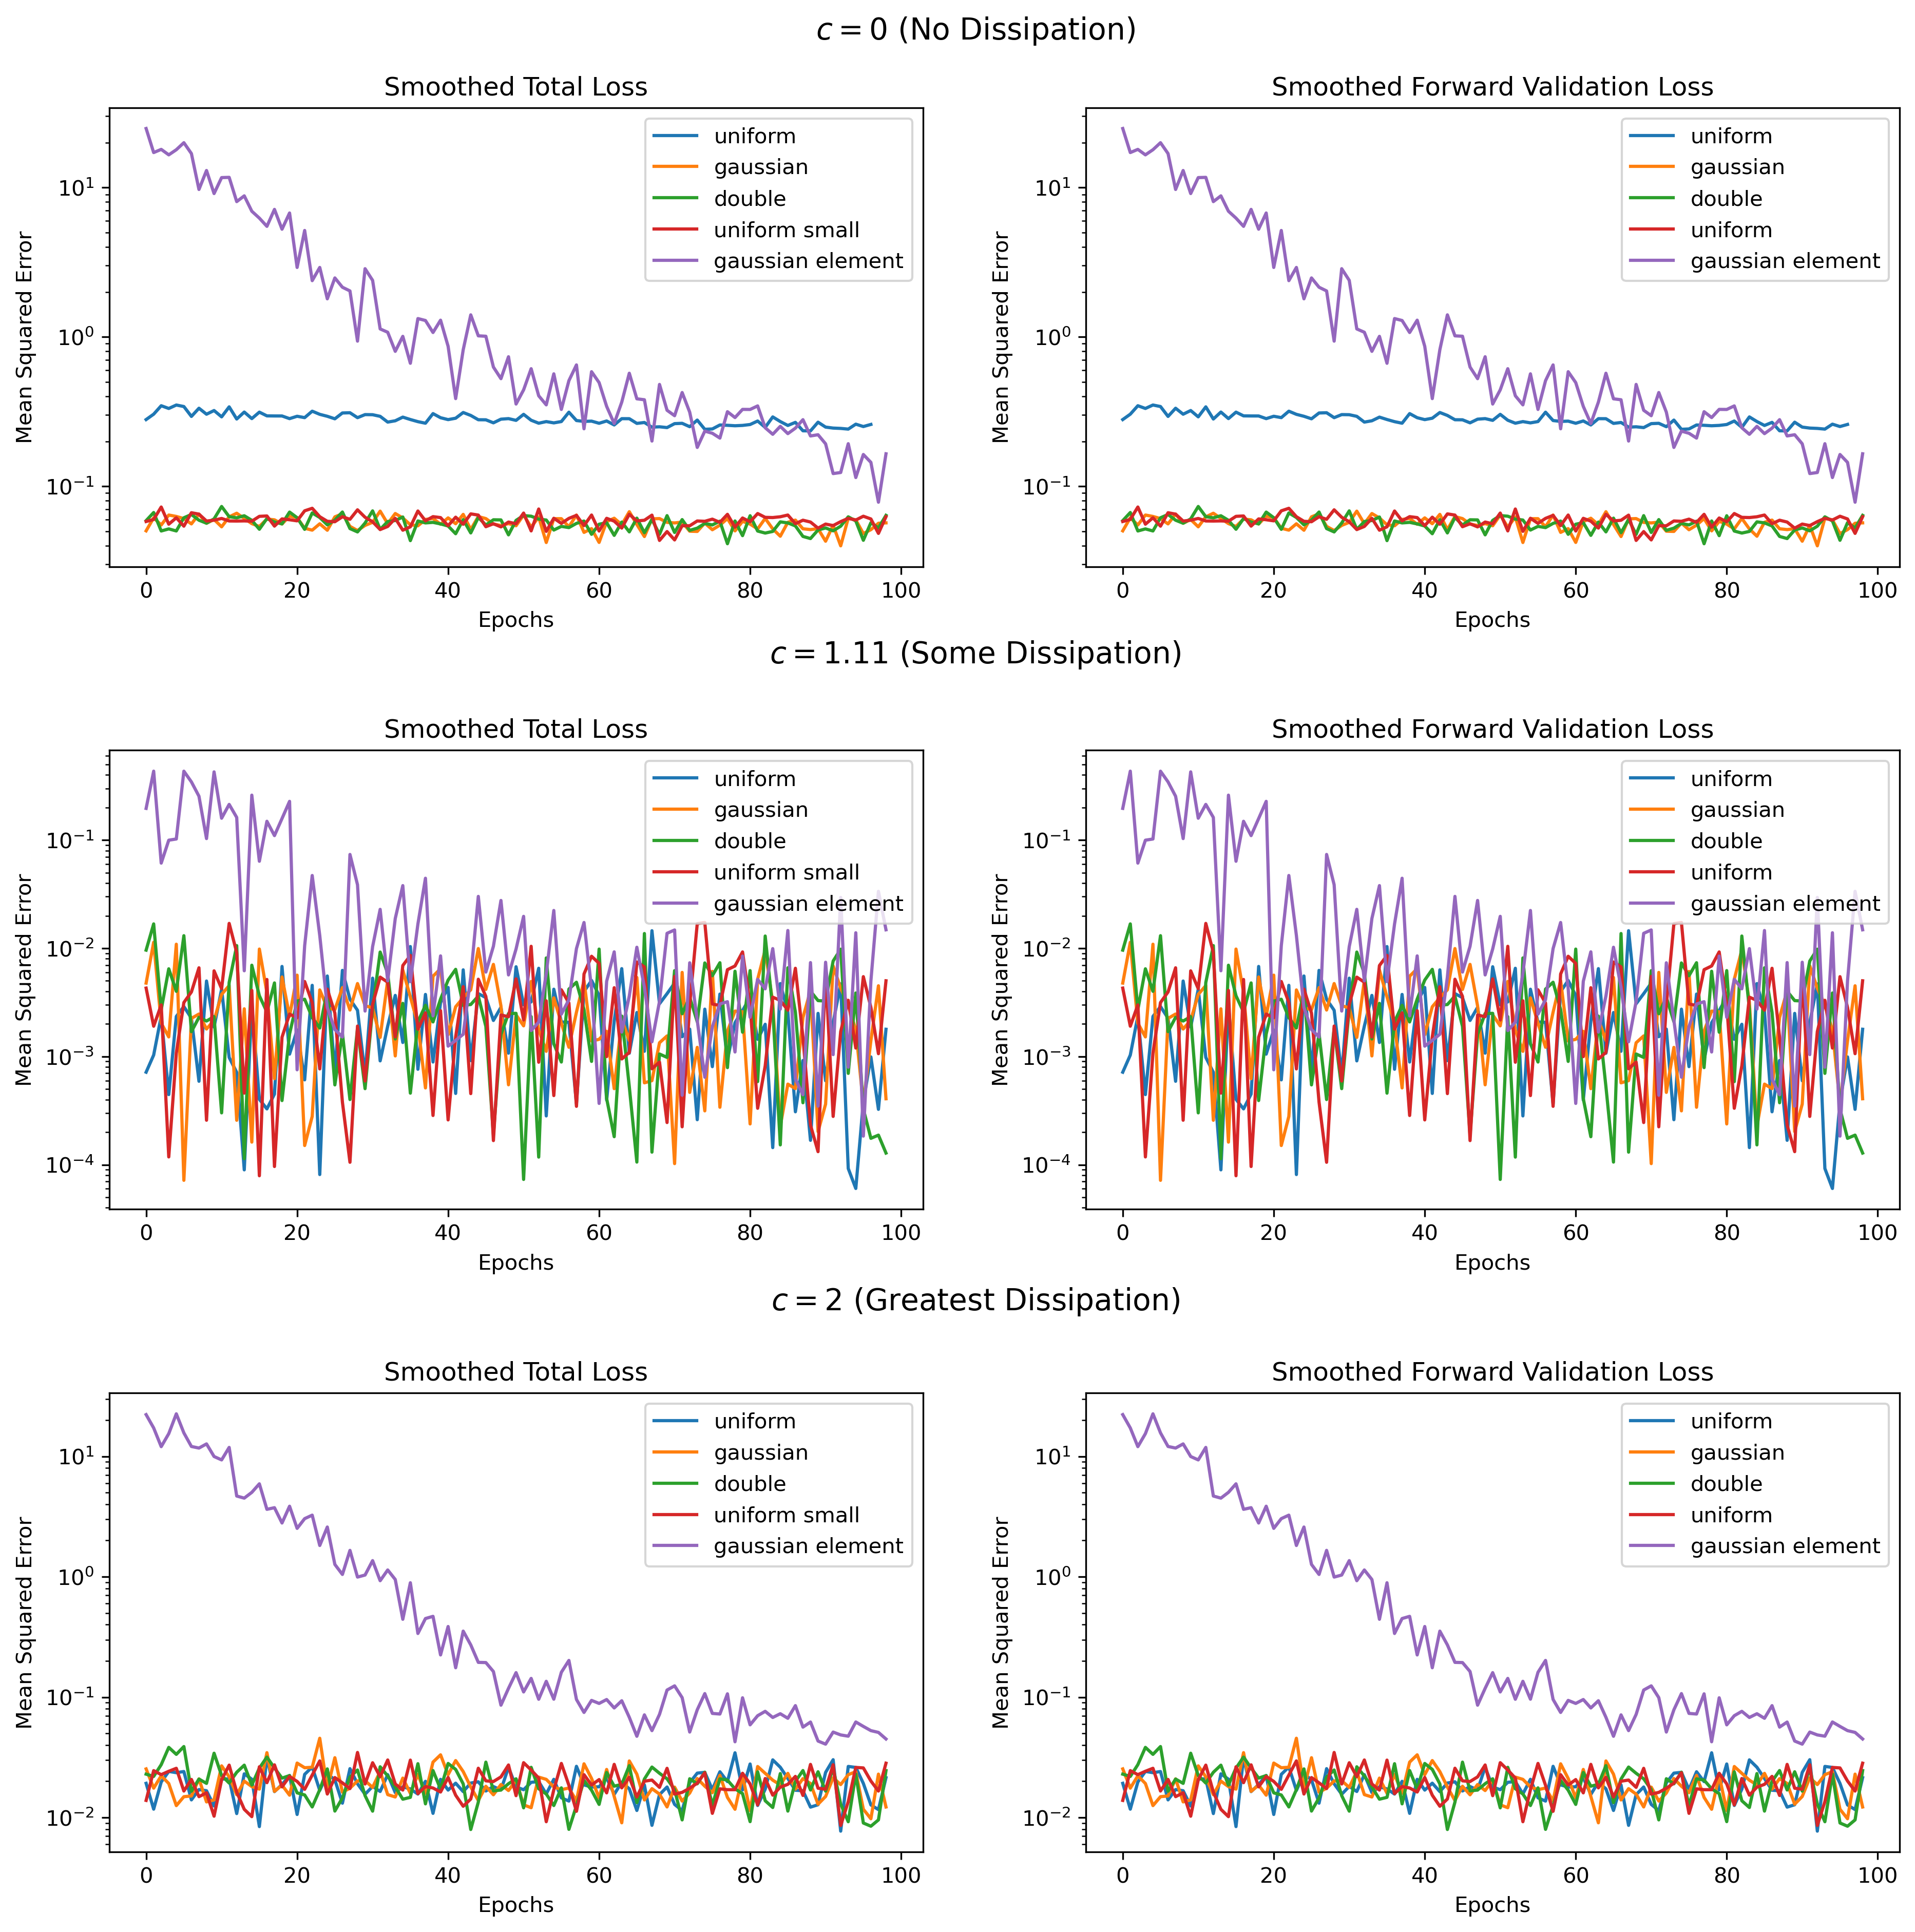

In [16]:
fig, axs = plt.subplots(3,2,figsize=(15,15), dpi=300)

for label, item_list in final_list_loss_diss0.items():
    if label.startswith('no-penalty'):
        print(label)
        if label.endswith('uniform-small'):
            lbl = 'uniform small'
        else:
            lbl = label.split('-')[2]
            
        axs[0][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_diss0.items():
    if label.startswith('no-penalty'):
        axs[0][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
for label, item_list in final_list_loss_diss5.items():
    if label.startswith('no-penalty'):
        print(label)
        if label.endswith('uniform-small'):
            lbl = 'uniform small'
        else:
            lbl = label.split('-')[2]
            
        axs[1][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_diss5.items():
    if label.startswith('no-penalty'):
        axs[1][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
for label, item_list in final_list_loss_diss9.items():
    if label.startswith('no-penalty'):
        print(label)
        if label.endswith('uniform-small'):
            lbl = 'uniform small'
        else:
            lbl = label.split('-')[2]
            
        axs[2][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_diss9.items():
    if label.startswith('no-penalty'):
        axs[2][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.legend(loc=1)

    l[0].set_title('Smoothed Total Loss')
    l[1].set_title('Smoothed Forward Validation Loss')
        
plt.figtext(0.5,0.92, "$c = 0$ (No Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.65, "$c = 1.11$ (Some Dissipation)", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.37, "$c = 2$ (Greatest Dissipation)", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('new_avg_diss_graph_init.png')

max-uniform
max-gaussian
max-double-gaussian
max-uniform-small
max-gaussian element
Here
inverse-uniform
inverse-gaussian
inverse-double-gaussian
inverse-uniform-small
inverse-gaussian element
Here
average-uniform
average-gaussian
average-double-gaussian
average-uniform-small
average-gaussian element
Here
no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element
Here
Here
Here


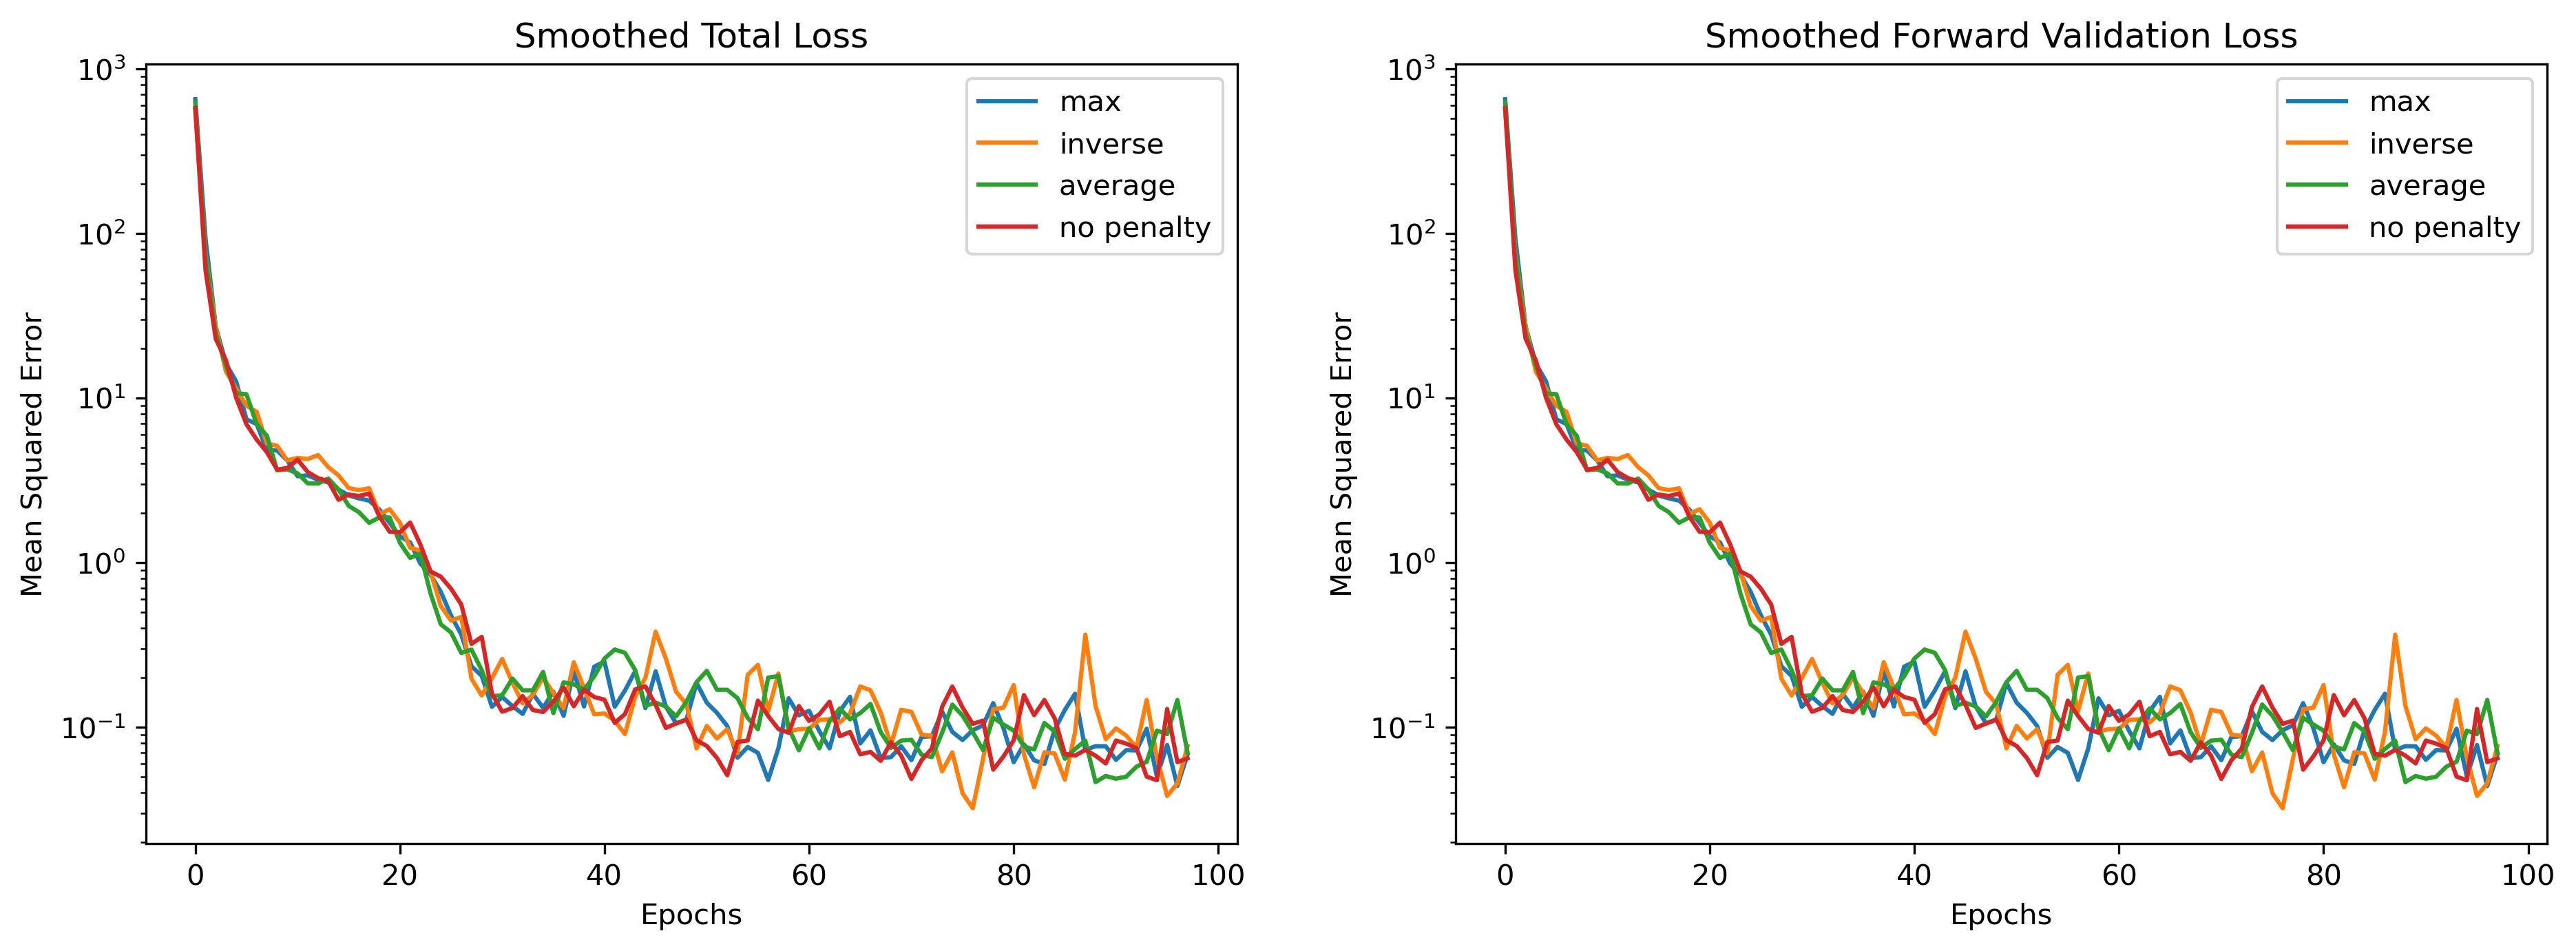

In [7]:
fig, axs = plt.subplots(1,2,figsize=(15,5), dpi=300)

for label, item_list in final_list_loss_fluid.items():
    print(label)
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[0].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            print('Here')
            axs[0].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])
        
for label, item_list in final_list_val_fluid.items():
    if label.endswith('gaussian element'):
        if label.split('-')[0] == 'no':
            axs[1].plot(list(range(0,98)),item_list[:98], label='no penalty')
        else:
            print('Here')
            axs[1].plot(list(range(0,98)),item_list[:98], label=label.split('-')[0])

for ax in axs:
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Mean Squared Error')
    ax.set_yscale('log')
    ax.legend(loc=1)

axs[0].set_title('Smoothed Total Loss')
axs[1].set_title('Smoothed Forward Validation Loss')
    
plt.savefig('fluids_graph_penal.png')


# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)

no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element
no-penalty-uniform
no-penalty-gaussian
no-penalty-double-gaussian
no-penalty-uniform-small
no-penalty-gaussian element


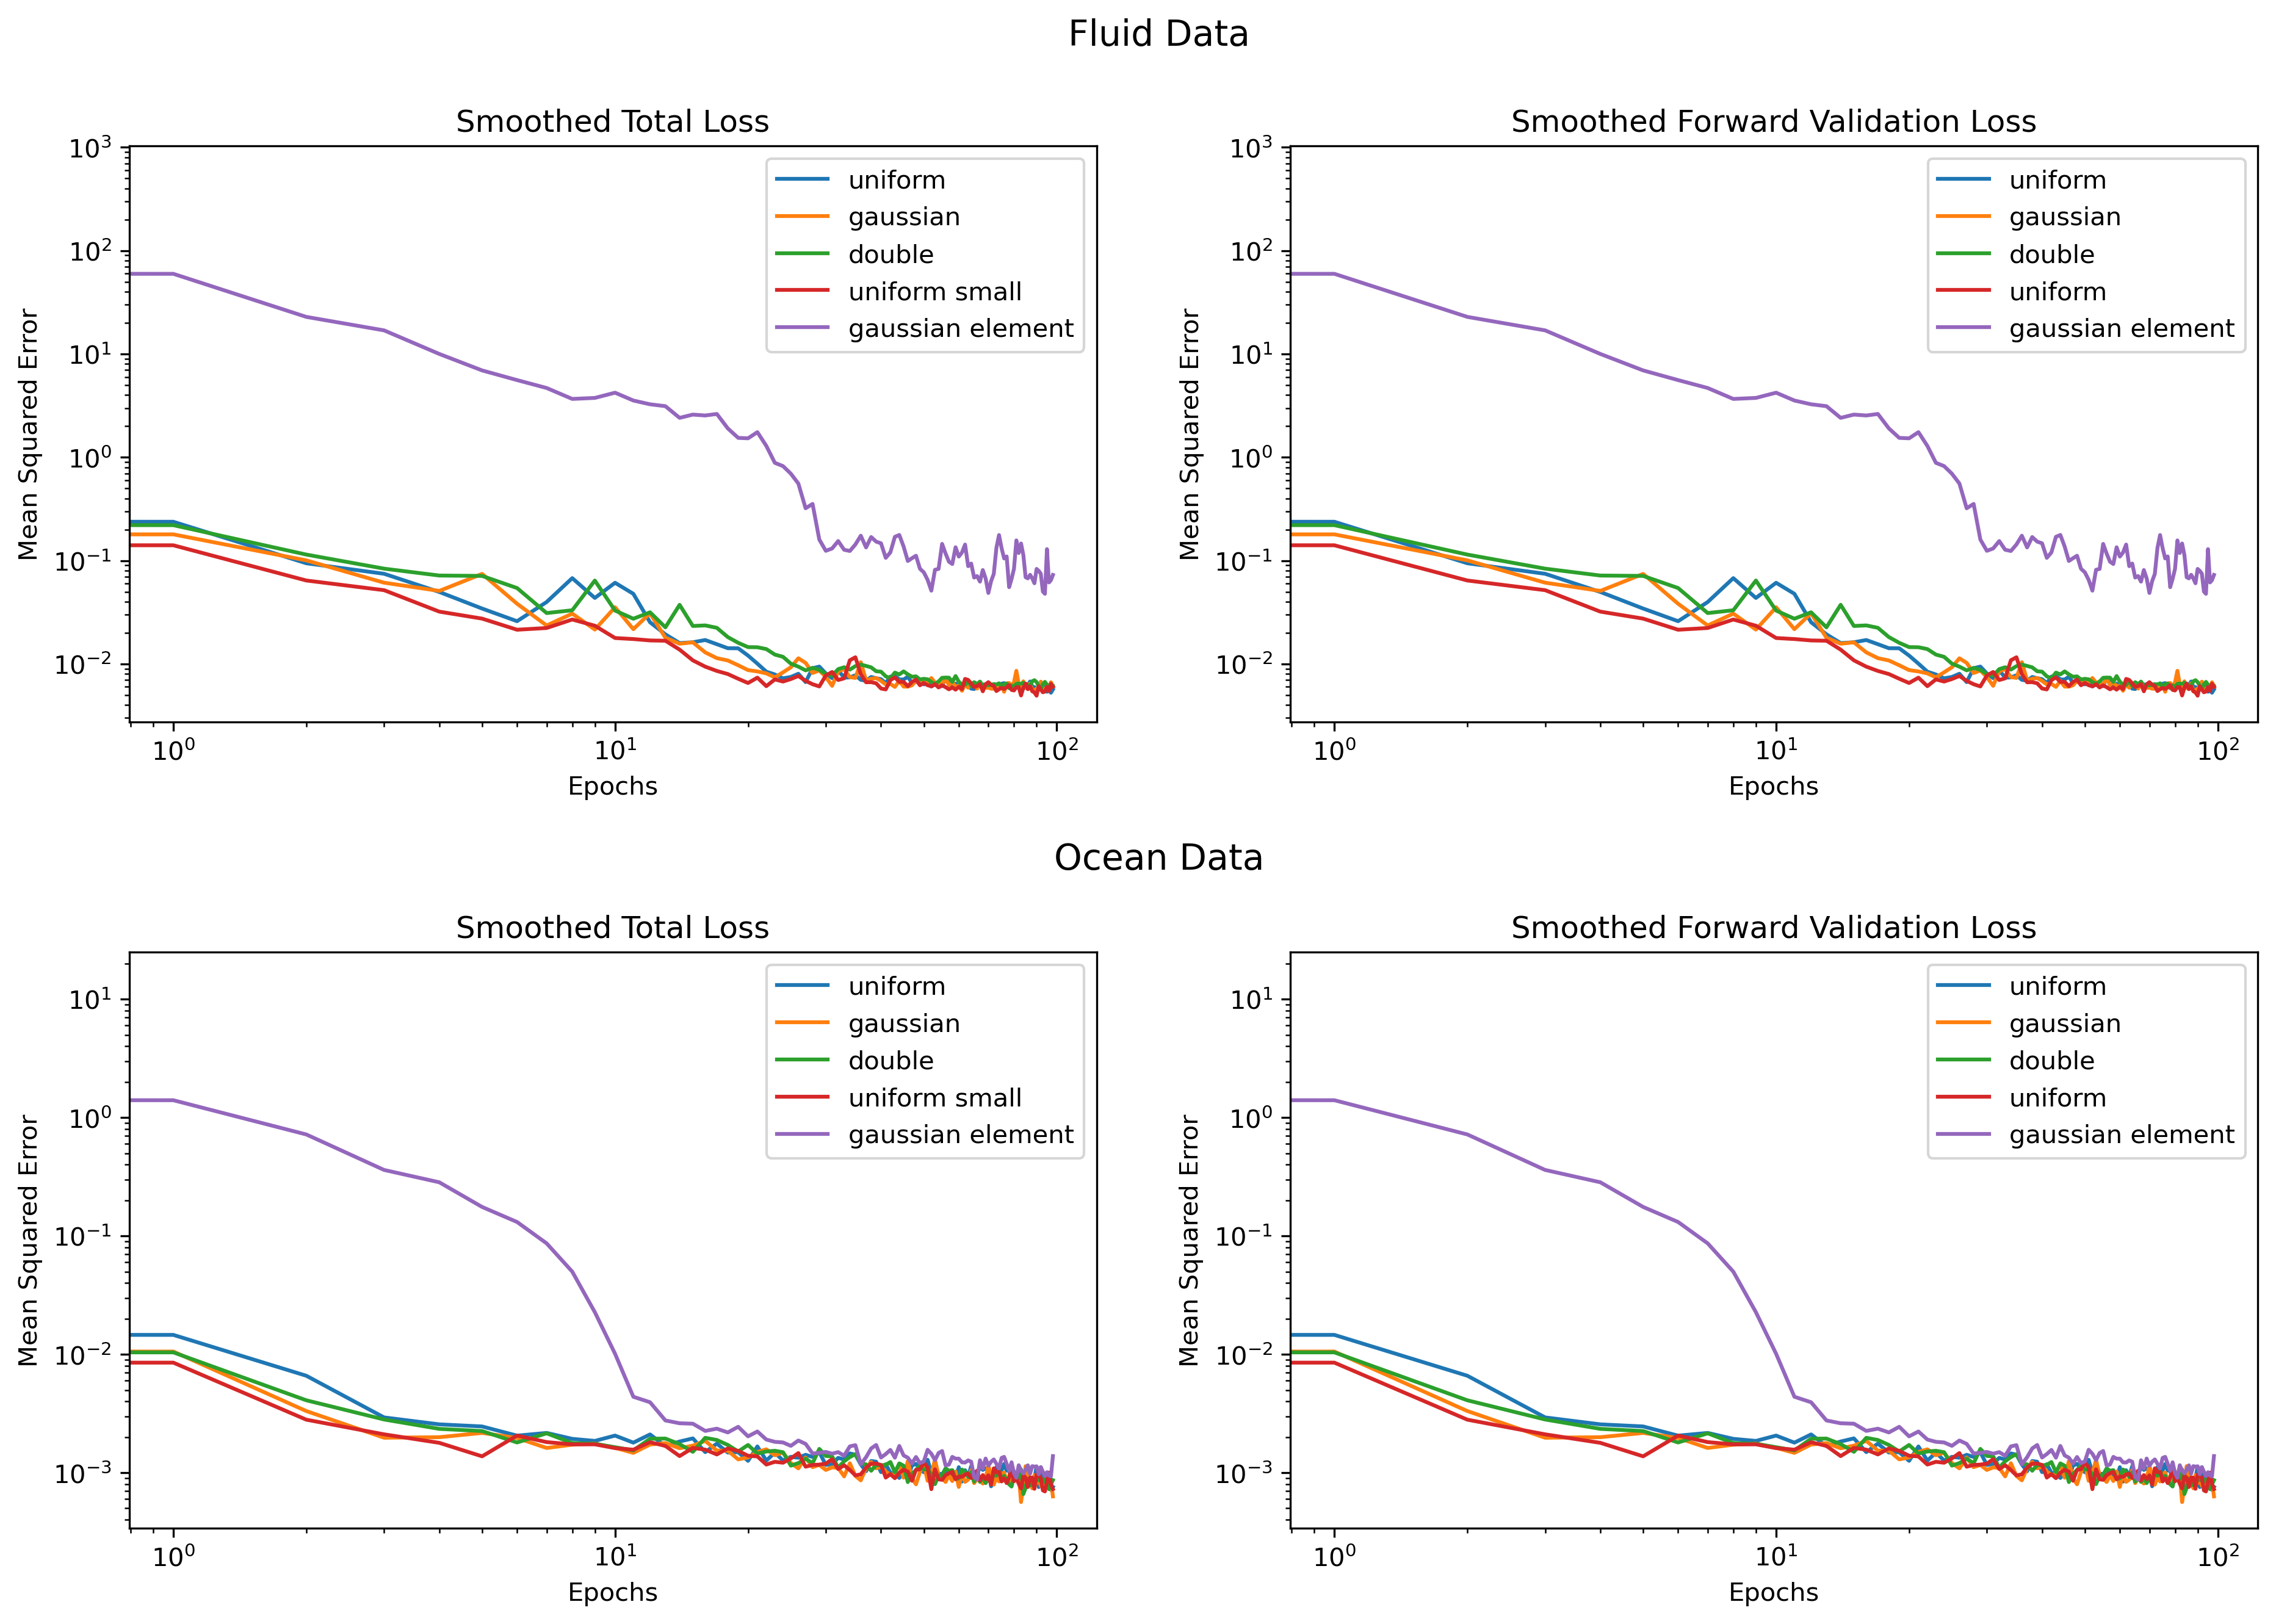

In [20]:
fig, axs = plt.subplots(2,2,figsize=(15,10), dpi=300)

for label, item_list in final_list_loss_fluid.items():
    if label.startswith('no-penalty'):
        print(label)
        if label.endswith('uniform-small'):
            lbl = 'uniform small'
        else:
            lbl = label.split('-')[2]
            
        axs[0][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
    
for label, item_list in final_list_loss_ocean.items():
    if label.startswith('no-penalty'):
        print(label)
        if label.endswith('uniform-small'):
            lbl = 'uniform small'
        else:
            lbl = label.split('-')[2]
            
        axs[1][0].plot(list(range(0,len(item_list))),item_list, label=lbl)
        
for label, item_list in final_list_val_fluid.items():
    if label.startswith('no-penalty'):
        axs[0][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))
        
for label, item_list in final_list_val_ocean.items():
    if label.startswith('no-penalty'):
        axs[1][1].plot(list(range(0,len(item_list))),item_list, label=str(label.split('-')[2]))

for l in axs:
    for ax in l:
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Mean Squared Error')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend(loc=1)

    l[0].set_title('Smoothed Total Loss')
    l[1].set_title('Smoothed Forward Validation Loss')
    
plt.figtext(0.5,0.95, "Fluid Data", ha="center", va="top", fontsize=14)
plt.figtext(0.5,0.5, "Ocean Data", ha="center", va="top", fontsize=14)
plt.subplots_adjust(hspace = 0.4 )
plt.savefig('ocean_and_fluids_graph_init.png')


# axs[0].set_xlabel('Epochs')
# axs[1].set_ylabel('Mean Squared Error')


# plt.plot(df['gaussian_double_dist_init-pendulum - forward loss'].ewm(span = 10).mean(),
#          label='None')
# plt.plot(df['Maximal eigen-loss without eigen-initialisation - forward loss'].ewm(span = 10).mean(), 
#          label='Loss')
# plt.plot(df['spectral_init_uniform-cyclone - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation')
# plt.plot(df['sepctral_eigen_init_with_2_to_2_uniform_distribution - forward loss'].ewm(span = 10).mean(), 
#          label='Initialisation & Loss')
# plt.ylim(0.1,1)
# plt.xlim(0,50)
# plt.title(name)